#### What are the most demanded skills for the top 3 most popular data roles?

In [22]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [82]:
df_US = df[df['job_country'] == 'United States'].copy()

df_US_skills = df_US.explode('job_skills')

df_US_skills_count = df_US_skills.groupby(['job_skills', 'job_title_short']).size()

df_US_skills_count = df_US_skills_count.reset_index(name='skill_count')
df_US_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_US_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [56]:
job_titles = df_US_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

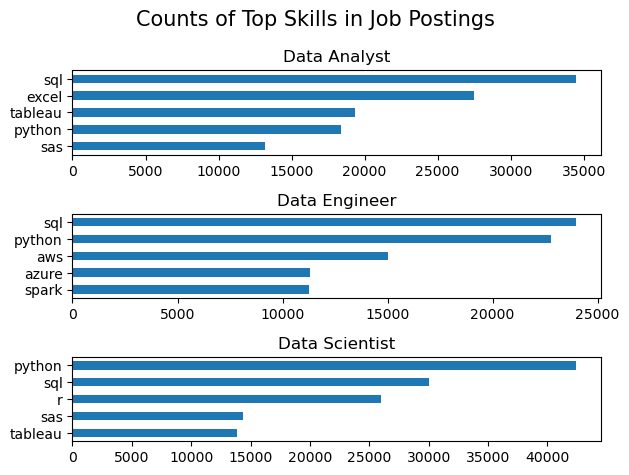

In [68]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_US_skills_count[df_US_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [60]:

df_US_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [64]:
df_skill_perc = pd.merge(df_US_skills_count, df_US_title_count, how='left', on='job_title_short')
df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count']/df_skill_perc['jobs_total']
df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


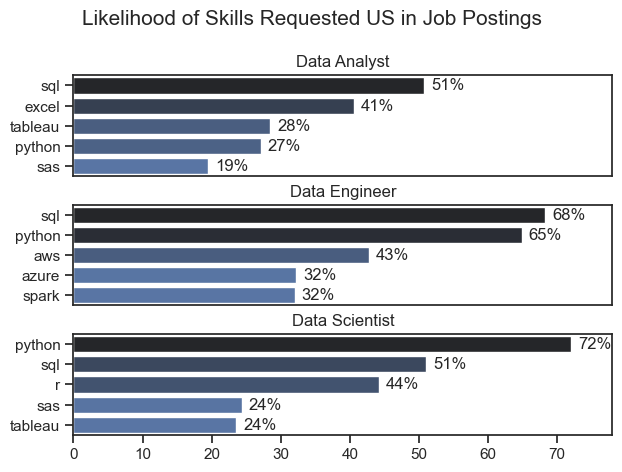

In [81]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax = ax[i], title=job_title)
    # ax[i].invert_yaxis()
    # ax[i].set_ylabel('')
    # ax[i].legend().set_visible(False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Skills Requested US in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()